
#  Latent Factor Recommender System


![image.png](images/author.png)

The NetFlix Challenge

**Training data**  100 million ratings, 480,000 users, 17,770 movies. 6 years of data: 2000-2005

**Test data**  Last few ratings of each user (2.8 million)

**Competition**  2,700+ teams, $1 million prize for 10% improvement on Netflix

- Evaluation criterion: Root Mean Square Error (RMSE) 

\begin{equation}
  RMSE =  \frac{1}{|R|} \sqrt{\sum_{(i, x)\in R}(\hat{r}_{xi} - r_{xi})^2}
\end{equation}
- Netflix’s system RMSE: 0.9514

![image.png](images/latent.png)

![image.png](images/latent2.png)

![image.png](images/latent3.png)

![image.png](images/latent4.png)

![image.png](images/latent5.png)

U (m x m) , $\Sigma$(m x n),   $V^T$ (n x n)

In [74]:
import numpy as np

A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(A)
# Singular-value decomposition
U, s, VT = np.linalg.svd(A)
# create n x n Sigma matrix
Sigma = np.diag(s)
# reconstruct matrix
PT = Sigma.dot(VT)
#B = U.dot(Sigma.dot(VT))
print(PT)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[-8.08154958e+00 -9.64331175e+00 -1.12050739e+01]
 [-8.29792976e-01 -8.08611173e-02  6.68070742e-01]
 [-1.36140716e-16  2.72281431e-16 -1.36140716e-16]]


$\Sigma$本来应该跟A矩阵的大小一样，但linalg.svd()只返回了一个行向量的$\Sigma$，并且舍弃值为0的奇异值。因此，必须先将$\Sigma$转化为矩阵。

![image.png](images/latent6.png)

In [91]:
# Singular-value decomposition 
A = np.array([[1, 2], [3, 4], [5, 6]])
U, s, VT = np.linalg.svd(A)
# create n x n Sigma matrix
Sigma = np.zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[1], :A.shape[1]] = np.diag(s)
# reconstruct matrix
PT = Sigma.dot(VT)
B = U.dot(PT)

print('A = \n', A, '\n')
print('U = \n', U, '\n')
print('Sigma = \n', Sigma, '\n')
print('VT = \n', VT, '\n')
print('PT = \n', PT, '\n')
print('B = \n', B, '\n') 

A = 
 [[1 2]
 [3 4]
 [5 6]] 

U = 
 [[-0.2298477   0.88346102  0.40824829]
 [-0.52474482  0.24078249 -0.81649658]
 [-0.81964194 -0.40189603  0.40824829]] 

Sigma = 
 [[9.52551809 0.        ]
 [0.         0.51430058]
 [0.         0.        ]] 

VT = 
 [[-0.61962948 -0.78489445]
 [-0.78489445  0.61962948]] 

PT = 
 [[-5.90229186 -7.47652631]
 [-0.40367167  0.3186758 ]
 [ 0.          0.        ]] 

B = 
 [[1. 2.]
 [3. 4.]
 [5. 6.]] 



In [107]:
# Singular-value decomposition
A = np.array([[1, 2, 3], 
              [4, 5, 6]])
U,S,VT = np.linalg.svd(A)
# create n x n Sigma matrix
Sigma = np.zeros((A.shape[1], A.shape[1]))
# populate Sigma with n x n diagonal matrix
if A.shape[1] > S.shape[0]:
    S = np.append(S, 0)
Sigma[:A.shape[1], :A.shape[1]] = np.diag(S)

PT= Sigma.dot(VT)
PT = PT[0:A.shape[0]]
B = U.dot(PT)
print('A = \n', A, '\n')
print('U = \n', U, '\n')
print('Sigma = \n', Sigma, '\n')
print('VT = \n', VT, '\n')
print('PT = \n', PT, '\n')
print('B = \n', B, '\n')

A = 
 [[1 2 3]
 [4 5 6]] 

U = 
 [[-0.3863177  -0.92236578]
 [-0.92236578  0.3863177 ]] 

Sigma = 
 [[9.508032   0.         0.        ]
 [0.         0.77286964 0.        ]
 [0.         0.         0.        ]] 

VT = 
 [[-0.42866713 -0.56630692 -0.7039467 ]
 [ 0.80596391  0.11238241 -0.58119908]
 [ 0.40824829 -0.81649658  0.40824829]] 

PT = 
 [[-4.07578082 -5.38446431 -6.69314779]
 [ 0.62290503  0.08685696 -0.44919112]] 

B = 
 [[1. 2. 3.]
 [4. 5. 6.]] 



![image.png](images/latent7.png)

![image.png](images/latent8.png)

SVD gives minimum reconstruction error (Sum of Squared Errors, **SSE**)

SSE and RMSE are monotonically related:$RMSE=\frac{1}{c}\sqrt{SSE}$
 
Great news: SVD is minimizing RMSE

In [226]:
# https://beckernick.github.io/matrix-factorization-recommender/
import pandas as pd
import numpy as np

ratings_list = [i.strip().split("::") for i in open('/Users/datalab/bigdata/cjc/ml-1m/ratings.dat', 'r').readlines()]
users_list = [i.strip().split("::") for i in open('/Users/datalab/bigdata/cjc/ml-1m/users.dat', 'r').readlines()]
movies_list = [i.strip().split("::") for i in open('/Users/datalab/bigdata/cjc/ml-1m/movies.dat', 'r', encoding = 'iso-8859-15').readlines()]

ratings_df = pd.DataFrame(ratings_list, columns = ['UserID', 'MovieID', 'Rating', 'Timestamp'], dtype = int)
movies_df = pd.DataFrame(movies_list, columns = ['MovieID', 'Title', 'Genres'])

movies_df['MovieID'] = movies_df['MovieID'].astype('int64')
ratings_df['UserID'] = ratings_df['UserID'].astype('int64')
ratings_df['MovieID'] = ratings_df['MovieID'].astype('int64')

In [219]:
movies_df.head()


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [241]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [227]:
# 注意：使用0填充缺失值
R_df = ratings_df.pivot(index = 'UserID', columns ='MovieID', values = 'Rating').fillna(0)
R_df.head()

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [228]:
R = R_df.to_numpy(dtype=np.int16)
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)

In [229]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned, k = 50)

In [230]:
sigma = np.diag(sigma)

all_user_predicted_ratings = U.dot( sigma.dot(Vt)) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = R_df.columns)


In [239]:
preds_df
# each row is a user
# each column is a movie

MovieID,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,4.288861,0.143055,-0.195080,-0.018843,0.012232,-0.176604,-0.074120,0.141358,-0.059553,-0.195950,...,0.027807,0.001640,0.026395,-0.022024,-0.085415,0.403529,0.105579,0.031912,0.050450,0.088910
1,0.744716,0.169659,0.335418,0.000758,0.022475,1.353050,0.051426,0.071258,0.161601,1.567246,...,-0.056502,-0.013733,-0.010580,0.062576,-0.016248,0.155790,-0.418737,-0.101102,-0.054098,-0.140188
2,1.818824,0.456136,0.090978,-0.043037,-0.025694,-0.158617,-0.131778,0.098977,0.030551,0.735470,...,0.040481,-0.005301,0.012832,0.029349,0.020866,0.121532,0.076205,0.012345,0.015148,-0.109956
3,0.408057,-0.072960,0.039642,0.089363,0.041950,0.237753,-0.049426,0.009467,0.045469,-0.111370,...,0.008571,-0.005425,-0.008500,-0.003417,-0.083982,0.094512,0.057557,-0.026050,0.014841,-0.034224
4,1.574272,0.021239,-0.051300,0.246884,-0.032406,1.552281,-0.199630,-0.014920,-0.060498,0.450512,...,0.110151,0.046010,0.006934,-0.015940,-0.050080,-0.052539,0.507189,0.033830,0.125706,0.199244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,2.392388,0.233964,0.413676,0.443726,-0.083641,2.192294,1.168936,0.145237,-0.046551,0.560895,...,0.188493,-0.004439,-0.042271,-0.090101,0.276312,0.133806,0.732374,0.271234,0.244983,0.734771
6036,2.070760,0.139294,-0.012666,-0.176990,0.261243,1.074234,0.083999,0.013814,-0.030179,-0.084956,...,-0.161548,0.001184,-0.029223,-0.047087,0.099036,-0.192653,-0.091265,0.050798,-0.113427,0.033283
6037,0.619089,-0.161769,0.106738,0.007048,-0.074701,-0.079953,0.100220,-0.034013,0.007671,0.001280,...,-0.053546,0.005835,0.007551,-0.024082,-0.010739,-0.008863,-0.099774,-0.013369,-0.030354,-0.114936
6038,1.503605,-0.036208,-0.161268,-0.083401,-0.081617,-0.143517,0.106668,-0.054404,-0.008826,0.205801,...,-0.006104,0.008933,0.007595,-0.037800,0.050743,0.024052,-0.172466,-0.010904,-0.038647,-0.168359


In [246]:
def recommend_movies(preds_df, user_row_number, movies_df, ratings_df, num_recommendations=5):
    # Get and sort the user's predictions
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    
    # Get the user's data and merge in the movie information.
    userID = user_row_number + 1
    user_data = ratings_df[ratings_df.UserID == userID]
    user_full = (user_data.merge(movies_df, how = 'left', left_on = 'MovieID', right_on = 'MovieID').
                     sort_values(['Rating'], ascending=False)
                 )

    print('UserID {0} has already rated {1} movies.'.format(userID, user_full.shape[0]))
    print('Recommending the highest {0} predicted ratings movies not already rated.'.format(num_recommendations))
    
    # Recommend the highest predicted rating movies that the user hasn't seen yet.
    potential_movie_df= movies_df[~movies_df['MovieID'].isin(user_full['MovieID'])]
    predicted_movie_df = pd.DataFrame(sorted_user_predictions).reset_index()
    predicted_movie_df['MovieID'] = predicted_movie_df['MovieID'].astype('int64')
    recommendations = (
        potential_movie_df.merge(predicted_movie_df, how = 'left', on = 'MovieID').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations 

In [247]:
already_rated, predictions = recommend_movies(preds_df, 0, movies_df, ratings_df, 10)

UserID 1 has already rated 53 movies.
Recommending the highest 10 predicted ratings movies not already rated.


In [238]:
already_rated[:3]


,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
46,1,1029,5,978302205,Dumbo (1941),Animation|Children's|Musical
40,1,1,5,978824268,Toy Story (1995),Animation|Children's|Comedy


In [237]:
predictions

,MovieID,Title,Genres
311,318,"Shawshank Redemption, The (1994)",Drama
32,34,Babe (1995),Children's|Comedy|Drama
356,364,"Lion King, The (1994)",Animation|Children's|Musical
1975,2081,"Little Mermaid, The (1989)",Animation|Children's|Comedy|Musical|Romance
1235,1282,Fantasia (1940),Animation|Children's|Musical
1974,2080,Lady and the Tramp (1955),Animation|Children's|Comedy|Musical|Romance
1972,2078,"Jungle Book, The (1967)",Animation|Children's|Comedy|Musical
1990,2096,Sleeping Beauty (1959),Animation|Children's|Musical
1981,2087,Peter Pan (1953),Animation|Children's|Fantasy|Musical
348,356,Forrest Gump (1994),Comedy|Romance|War


比较三种矩阵分解的方法
- 特征值分解 Eigen value decomposition
    - 只能用于方阵
- 奇异值分解 Singular value decomposition
    - 需要填充稀疏矩阵中的缺失元素
    - 计算复杂度高 $O(mn^2)$
- 梯度下降 Gradient Descent
    - 广泛使用！

![image.png](images/latent9.png)

## Including bias

![image.png](images/latent10.png)

\begin{equation}
  \hat{r}_{xi}= u + b_x + b_i + q_i p_x^{T}
\end{equation}

- $u$ is the global bias, measured by the overall mean rating
- $b_x$ is the bias for user x, measured by the mean rating given by user x.
- $b_i$ is the bias for movie i, measured by the mean ratings of movie i.
- $q_i p_{x}^{T}$ is the user-movie interaction

![image.png](images/latent11.png)

![image.png](images/latent12.png)

![image.png](images/latent13.png)

<div><img src=attachment:image.png width = 800></div>
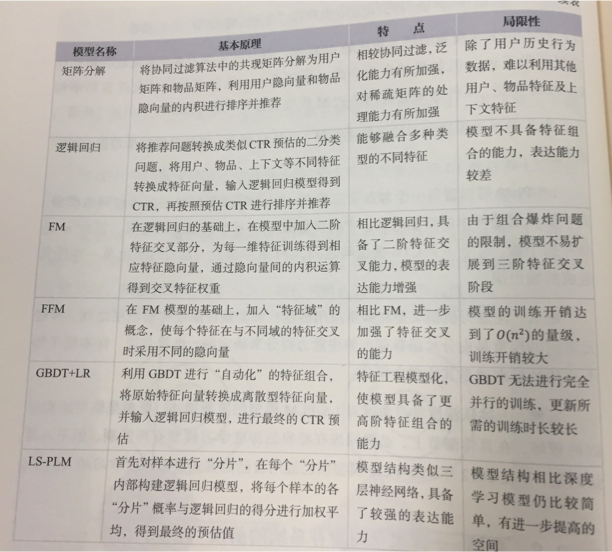

## Further reading:
Y. Koren, Collaborative filtering with temporal dynamics, KDD ’09
- http://www2.research.att.com/~volinsky/netflix/bpc.html
- http://www.the-ensemble.com/


![](images/recsys14.png)

![image.png](images/end.png)